# Import statements

In [37]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
dfCCO = pd.read_csv(r"..\Data\cco_cost_monthly.csv")

In [3]:
dfPYCO = pd.read_csv(r"..\Data\pyco_cost_monthly.csv", low_memory=False)

In [4]:
dfXCO = pd.read_csv(r"..\Data\xco_cost_monthly.csv")

# EDA and analysis

In [5]:
dfCCO.head()

,cloud_resource_id,usage_account_id,billing_account_id,provider_code,usage_amount,currency_code,tax,sub_total,total_cost,system_currency_code,...,pricing_unit,memory,operating_system,vpcu,phsyical_processor,volume_type,storage,storage_class,storage_media,invoice_month
0,NaN,751355800400,751355800400,aws,1.0,USD,0.0,0.0,0.03,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
1,NaN,751355800400,751355800400,aws,2.0,USD,0.0,0.0,0.07,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
2,NaN,751355800400,751355800400,aws,1.0,USD,0.0,0.0,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
3,arn:aws:kms:us-east-1:751355800400:key/5fedb8a...,751355800400,751355800400,aws,18.0,USD,0.0,0.0,0.00,USD,...,Requests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
4,arn:aws:cognito-idp:us-east-1:751355800400:use...,751355800400,751355800400,aws,2.0,USD,0.0,0.0,0.00,USD,...,Requests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01


In [42]:
dfCCO["invoice_month"].unique()

array(['2020-08-01', '2020-10-01', '2021-03-01', '2020-09-01',
       '2021-01-01', '2020-12-01', '2021-02-01', '2020-11-01'],
      dtype=object)

In [6]:
dfCCO.describe()

,usage_account_id,billing_account_id,usage_amount,tax,sub_total,total_cost,conversion_rate,converted_total_cost,blended_rate,unblended_rate,unblended_cost,pricing_rate_id,public_ondemand_cost,public_ondemand_rate,vpcu
count,2.480000e+03,2.480000e+03,2480.000000,2480.0,2480.0,2480.000000,2480.0,2480.000000,2480.000000,2480.000000,2480.000000,2.432000e+03,2.480000e+03,2480.000000,127.000000
mean,7.513558e+11,7.513558e+11,138.260043,0.0,0.0,0.572872,1.0,0.572872,0.019913,0.019913,0.572872,2.542116e+09,5.402971e-01,0.038027,2.181102
std,0.000000e+00,0.000000e+00,3015.668306,0.0,0.0,5.289228,0.0,5.289228,0.242920,0.242920,5.289228,3.406562e+08,5.270190e+00,0.256320,0.706178
min,7.513558e+11,7.513558e+11,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.636605e+09,0.000000e+00,0.000000,1.000000
25%,7.513558e+11,7.513558e+11,0.000004,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.276567e+09,0.000000e+00,0.000000,2.000000
50%,7.513558e+11,7.513558e+11,0.000342,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.557254e+09,2.729000e-07,0.010400,2.000000
75%,7.513558e+11,7.513558e+11,0.343660,0.0,0.0,0.000046,1.0,0.000046,0.020000,0.020000,0.000046,2.850091e+09,2.068233e-04,0.030000,2.000000
max,7.513558e+11,7.513558e+11,100512.000000,0.0,0.0,132.254000,1.0,132.254000,12.000000,12.000000,132.254000,3.087511e+09,1.322540e+02,12.000000,4.000000


In [7]:
print(dfCCO.shape, dfPYCO.shape, dfXCO.shape)

(2480, 44) (956584, 44) (24946, 44)


In [10]:
dfCCO.loc[:, "currency_code"].unique()

array(['USD'], dtype=object)

In [12]:
dfPYCO.loc[:, "currency_code"].unique()

array(['USD'], dtype=object)

In [13]:
dfCCO["origin"] = "CCO"

In [14]:
dfPYCO["origin"] = "PYCO"

In [15]:
dfXCO["origin"] = "XCO"

In [19]:
dfTotal = pd.concat([dfCCO, dfPYCO, dfXCO], axis=0)

A total of almost a million rows and 45 columns! This is a pretty hefty dataset and will need some knowledge to compute higher level ideas.

In [20]:
dfTotal.shape

(984010, 45)

Get a sense of the percent null counts for each column

In [24]:
dfTotal.isna().sum() / dfTotal.shape[0]

cloud_resource_id       0.003146
usage_account_id        0.000000
billing_account_id      0.000000
provider_code           0.000000
usage_amount            0.000000
currency_code           0.000000
tax                     0.000000
sub_total               0.000000
total_cost              0.000000
system_currency_code    0.000000
conversion_rate         0.000000
converted_total_cost    0.000000
product_name            0.000000
service_code            0.084868
service_name            0.084906
product_sku             0.000605
availability_zone       0.995690
location_id             0.000605
usage_type              0.084868
usage_type_group        0.989718
cost_type               0.000000
instance_type           0.996030
blended_rate            0.000000
unblended_rate          0.000000
unblended_cost          0.000000
category                0.000000
clock_speed             0.996988
from_location           0.577076
to_location             0.577076
transfer_type           0.577076
pricing_ra

In [25]:
dfTotal.nunique()

cloud_resource_id       279088
usage_account_id             4
billing_account_id           3
provider_code                1
usage_amount            111997
currency_code                1
tax                          1
sub_total                    1
total_cost              132600
system_currency_code         1
conversion_rate              1
converted_total_cost    132600
product_name                47
service_code                41
service_name                40
product_sku                598
availability_zone           13
location_id                 18
usage_type                 525
usage_type_group            61
cost_type                    6
instance_type               52
blended_rate               479
unblended_rate             143
unblended_cost          127870
category                    60
clock_speed                 11
from_location               24
to_location                 28
transfer_type                6
pricing_rate_id           2866
public_ondemand_cost     66222
public_o

All of these clients are exclusively using AWS and not something like Azure or Google Cloud Services

In [26]:
dfTotal["storage"].unique()

array([nan, 'EBS only', 'EBS Only', '1 x 150 NVMe SSD', '60GB',
       '1 x 475 NVMe SSD', '2 x 300 NVMe SSD'], dtype=object)

In [29]:
dfTotal["operating_system"].unique()

array([nan, 'Linux', 'Windows', 'RHEL'], dtype=object)

In [36]:
dfTotal[dfTotal["operating_system"] == "Windows"].count() / dfTotal["operating_system"].count()

cloud_resource_id       0.020946
usage_account_id        0.020946
billing_account_id      0.020946
provider_code           0.020946
usage_amount            0.020946
currency_code           0.020946
tax                     0.020946
sub_total               0.020946
total_cost              0.020946
system_currency_code    0.020946
conversion_rate         0.020946
converted_total_cost    0.020946
product_name            0.020946
service_code            0.020946
service_name            0.020946
product_sku             0.020946
availability_zone       0.020946
location_id             0.020946
usage_type              0.020946
usage_type_group        0.000000
cost_type               0.020946
instance_type           0.020608
blended_rate            0.020946
unblended_rate          0.020946
unblended_cost          0.020946
category                0.020946
clock_speed             0.019595
from_location           0.000000
to_location             0.000000
transfer_type           0.000000
pricing_ra

In [45]:
dfTotal.loc[dfTotal["product_name"] != dfTotal["service_name"]][["service_name", "product_name"]]

,service_name,product_name
0,NaN,Elastic Load Balancing
1,NaN,Amazon Elastic Compute Cloud
2,NaN,Amazon Simple Storage Service
62,AWS Data Transfer,Elastic Load Balancing
63,AWS Data Transfer,Elastic Load Balancing
...,...,...
24878,AWS Data Transfer,Amazon Elastic Compute Cloud
24879,AWS Data Transfer,Amazon Elastic Compute Cloud
24880,AWS Data Transfer,Elastic Load Balancing
24881,AWS Data Transfer,Amazon Elastic Compute Cloud


In [53]:
def time_cost_agg(df):
    return df.groupby("invoice_month").agg({"total_cost": "sum"})

In [54]:
CCO_month_cost = time_cost_agg(dfCCO)

In [55]:
PYCO_month_cost = time_cost_agg(dfPYCO)

In [56]:
XCO_month_cost = time_cost_agg(dfXCO)

In [94]:
def hitter_monthly(df, product):
    dfFin = df.loc[df["product_name"] == product].groupby("invoice_month").agg({"total_cost": "sum"})
    return dfFin

In [87]:
dfXCO_month_EC2 = hitter_monthly(dfXCO, 0)

In [104]:
def plot_hitters(df_list, company, product):
    fig, ax = plt.subplots(3,3)


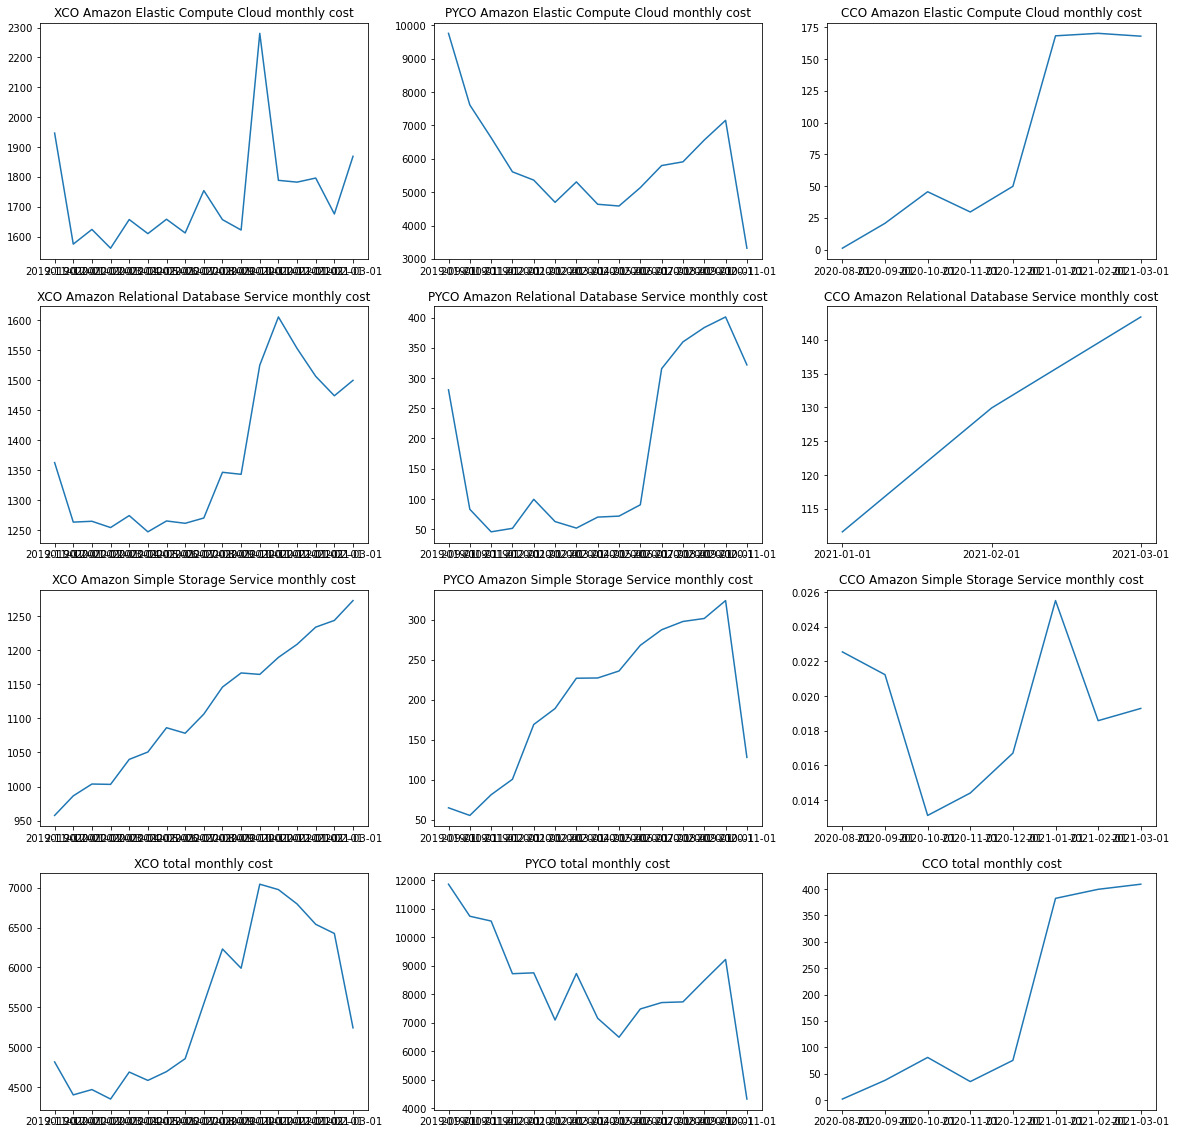

In [143]:
top_hitters = ["Amazon Elastic Compute Cloud", "Amazon Relational Database Service", "Amazon Simple Storage Service"]
company_dfs = [dfXCO, dfPYCO, dfCCO]
company_names = ["XCO", "PYCO", "CCO"]

final_df_list = []
fig, ax = plt.subplots(4,3, figsize=(20,20))
for hitter in range(len(top_hitters)):
    inter_list = []
    
    for index in range(len(company_names)):
        new_monthly_df = hitter_monthly(company_dfs[index], top_hitters[hitter])
        ax[hitter][index].plot(new_monthly_df)
        ax[hitter][index].set_title(str(company_names[index]) + " " + str(top_hitters[hitter]) + " monthly cost")
        inter_list.append(new_monthly_df)
    
    final_df_list.append(inter_list)

    
for index in range(len(company_names)):
    agg_df = time_cost_agg(company_dfs[index])
    ax[3][index].plot(agg_df)
    ax[3][index].set_title(str(company_names[index]) + " total monthly cost")
    
fig.savefig(r".\graphs.png")

<ipython-input-141-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [71]:
dfXCO.groupby("invoice_month")["product_name"].value_counts()

invoice_month  product_name                                  
2019-11-01     Amazon Elastic Compute Cloud                      2345
               Amazon Simple Storage Service                       94
               Amazon Route 53                                     48
               Amazon Relational Database Service                  43
               Amazon DocumentDB (with MongoDB compatibility)      35
                                                                 ... 
2021-03-01     Amazon ElastiCache                                   4
               Amazon Lightsail                                     4
               Amazon Elastic File System                           3
               AWS Config                                           2
               AWS Data Transfer                                    1
Name: product_name, Length: 302, dtype: int64

In [ ]:
dfXCO.groupby("invoice_month").["product_name"].value_counts()

In [82]:
dfXCO.groupby(["invoice_month", "product_name"]).agg({"total_cost": "sum"}).sort_values("total_cost", ascending=False)

total_cost
invoice_month product_name                                                
2019-11-01    AWS Data Transfer                               9.270000e+00
              AWS Key Management Service                      0.000000e+00
              Amazon DocumentDB (with MongoDB compatibility)  2.257187e+02
              Amazon DynamoDB                                 0.000000e+00
              Amazon EC2 Container Registry (ECR)             8.078937e-01
...                                                                    ...
2021-03-01    Amazon Simple Queue Service                     3.385000e-07
              Amazon Simple Storage Service                   1.272712e+03
              Amazon Virtual Private Cloud                    1.364142e+02
              AmazonCloudWatch                                6.197066e+01
              Elastic Load Balancing                          7.137647e+01

[302 rows x 1 columns]

In [58]:
CCO_month_cost.index = pd.to_datetime(CCO_month_cost.index)

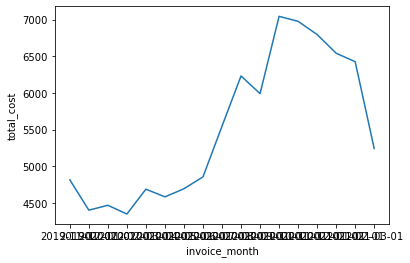

In [68]:
sns.lineplot(data=XCO_month_cost, x="invoice_month", y="total_cost");

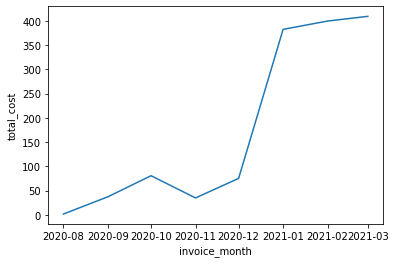

In [64]:
sns.lineplot(data=CCO_month_cost, x="invoice_month", y="total_cost");

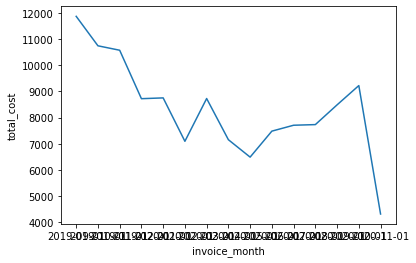

In [65]:
sns.lineplot(data=PYCO_month_cost, x="invoice_month", y="total_cost");

#### PYCO_month_cost

In [83]:
top_hitters = ["Amazon Elastic Compute Cloud", "Amazon Relational Database Service", "Amazon Simple Storage Service"]

In [78]:
dfTotal.groupby("product_name").agg({"total_cost": "sum"}).sort_values("total_cost", ascending=False)

,total_cost
product_name,
Amazon Elastic Compute Cloud,1.181974e+05
Amazon Relational Database Service,2.638917e+04
Amazon Simple Storage Service,2.189341e+04
Amazon DocumentDB (with MongoDB compatibility),1.504829e+04
Amazon Elastic File System,1.045719e+04
Amazon EC2 Container Service,5.785982e+03
AWS Lambda,5.608599e+03
Amazon ElastiCache,2.874396e+03
AWS Support (Developer),2.718490e+03
